<a href="https://colab.research.google.com/github/DevNicque/pos-datascience/blob/modulo_4/insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
con = sqlite3.connect('northwind_small.sqlite')

In [22]:
str_query = ('SELECT c.Region, od.OrderId, od.Quantity, od.UnitPrice, od.Discount '
             'FROM Customer c '
             'JOIN [Order] o ON c.Id = o.CustomerId '
             'JOIN OrderDetail od ON od.OrderID = o.Id')

In [23]:
df = pd.read_sql_query(str_query,con)
df.head()

,Region,OrderId,Quantity,UnitPrice,Discount
0,Western Europe,10248,12,14.0,0.0
1,Western Europe,10248,10,9.8,0.0
2,Western Europe,10248,5,34.8,0.0
3,Western Europe,10249,9,18.6,0.0
4,Western Europe,10249,40,42.4,0.0


In [24]:
df_i = df.copy()

In [25]:
df_i['price_per_order'] = df_i.Quantity * df_i.UnitPrice * (1-df_i.Discount)
df_i.drop(['Quantity', 'UnitPrice', 'Discount'], axis=1, inplace=True)
df_i = df_i.groupby(['Region','OrderId'])['price_per_order'].sum().reset_index()
df_i.drop('OrderId', axis=1, inplace = True)

In [26]:
df_i.head()

,Region,price_per_order
0,British Isles,479.4
1,British Isles,2645.0
2,British Isles,1762.0
3,British Isles,516.8
4,British Isles,240.4


In [30]:
df_i['price_per_order2'] = np.log(df_i['price_per_order'])
df_i.head()

,Region,price_per_order,price_per_order2
0,British Isles,479.4,6.172535
1,British Isles,2645.0,7.880426
2,British Isles,1762.0,7.474205
3,British Isles,516.8,6.247656
4,British Isles,240.4,5.482304


**Questão- Tem regiões que seus gastos médios por pedido são maiores em duas vezes que os gastos de outras regiões**

**Entendimento do negócio**

calculo dos gastos medios por regiao


In [48]:
df_media = df_i.copy()

In [49]:
df_media = df_i[['Region','price_per_order']].groupby(['Region']).mean().reset_index()

calculo das vezes que representam os gastos medios da região de valor com as outras regiões

In [50]:
percapita_max = df_media['price_per_order'].max()

In [51]:
df_media['diferenca_div'] = df_media.apply(lambda x: percapita_max / x['price_per_order'], axis = 1)

In [52]:
df_media['diferenca_sub'] = df_media.apply(lambda x: percapita_max - x['price_per_order'], axis = 1)

In [53]:
df_media

,Region,price_per_order,diferenca_div,diferenca_sub
0,British Isles,1452.682867,1.339540,493.244110
1,Central America,788.480952,2.467944,1157.446025
2,Eastern Europe,504.564286,3.856648,1441.362691
3,North America,1945.926977,1.000000,0.000000
4,Northern Europe,1584.657500,1.227980,361.269477
5,Scandinavia,876.614375,2.219821,1069.312602
6,South America,1123.447307,1.732103,822.479670
7,Southern Europe,706.651836,2.753728,1239.275141
8,Western Europe,1851.280914,1.051125,94.646063


In [55]:
df_media = df_media.sort_values('price_per_order')

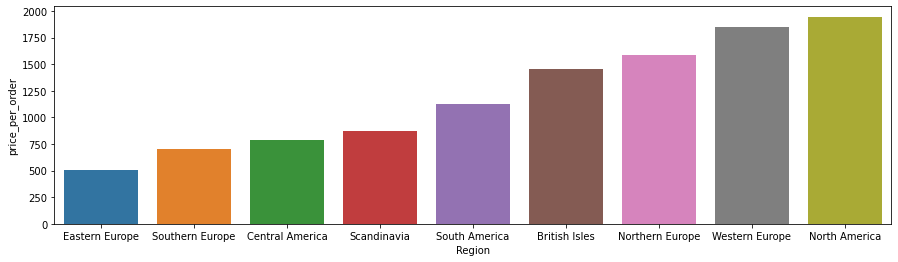

In [56]:
plt.figure(figsize=(15,4))
sns.barplot(x='Region', y='price_per_order', data = df_media)